In [1]:
using Pkg
Pkg.instantiate()
using TAMode
using Plots
using StaticArrays
using LinearAlgebra

In [2]:
using MCMCChains
chn = read("chain-file-10_1.jls", Chains)
summarize(chn)

Summary Statistics
     parameters      mean       std   naive_se      mcse       ess      rhat 
         Symbol   Float64   Float64    Float64   Float64   Float64   Float64 

        AXLexpr   33.7065    3.1431     0.1988    1.4321    5.4480    1.1274
         Ig2rev    0.0329    0.0635     0.0040    0.0267    5.0778    1.1228
         gasCur    0.1279    0.0902     0.0057    0.0332    7.2285    1.0841
    internalize    0.0473    0.0105     0.0007    0.0031   11.1634    1.0478
           kDeg    0.0212    0.0048     0.0003    0.0026    4.6812    1.1543
           kRec    0.1071    0.0119     0.0008    0.0031   18.7062    0.9973
  pYinternalize    1.0975    0.1366     0.0086    0.0163    9.8463    1.0011
          scale    0.0212    0.0066     0.0004    0.0034    5.1126    1.1014
      scaleSurf    0.0002    0.0002     0.0000    0.0001    5.4211    1.1160
          sortF    0.6591    0.1741     0.0110    0.1128    2.5145    1.3458
           xFwd    0.0008    0.0030     0.0002    0.00

In [3]:
xFwd = get(chn, :xFwd)[1];
Ig2rev = get(chn, :Ig2rev)[1];

In [4]:
dif = 0.1
gasPart = 10
gasCur = 0.01
AXL = 15.5
MerTK = 55
Tyro3 = 3.7
CompParams = vcat(dif, gasPart, gasCur, xFwd[1], AXL, MerTK, Tyro3, Ig2rev[1], [1.0, 1.0, 1.8, 100.0]);
tps = @SVector Float64[0.01, 0.1, 1];
r = 1:100;

In [5]:
pp = TAMode.compParamm(CompParams)
pY = TAMode.compTAM(tps, pp)
cplot = Array{Float64}(undef, length(tps), length(tps), 100)
cplot_total = Array{Float64}(undef, length(tps), length(tps), 100)
total_normalized = Array{Float64}(undef, length(tps), length(tps), 100)

3×3×100 Array{Float64,3}:
[:, :, 1] =
 2.122e-314    2.122e-314    1.04397e-315
 4.89231e-316  1.00056e-315  1.00056e-315
 6.36599e-314  2.122e-314    2.122e-314

[:, :, 2] =
 1.04397e-315  2.122e-314    1.52993e-308
 1.09242e-315  7.31515e-316  6.0147e-316
 6.36599e-314  6.36599e-314  6.36599e-314

[:, :, 3] =
 2.122e-314    2.122e-314    4.03179e-313
 1.06673e-315  1.00056e-315  9.88379e-316
 6.36599e-314  2.122e-314    6.36599e-314

...

[:, :, 98] =
 2.122e-314  0.0           9.54e-322
 0.0         9.97009e-316  1.00059e-315
 0.0         0.0           6.9161e-310

[:, :, 99] =
 1.00059e-315  2.122e-314  0.0
 1.69998e-316  0.0         9.96997e-316
 0.0           0.0         0.0

[:, :, 100] =
 4.8e-322      1.00059e-315  2.122e-314
 1.00059e-315  1.69998e-316  0.0
 6.9161e-310   0.0           0.0

In [7]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot[t, :, rr] .= dot(pYdata, TAMode.pYc)
        cplot_total[t, :, rr] .= dot(pYdata, TAMode.totalC)
        total_normalized[t, :, rr] = cplot[t, :, rr] ./ cplot_total[t, :, rr]
    end
end

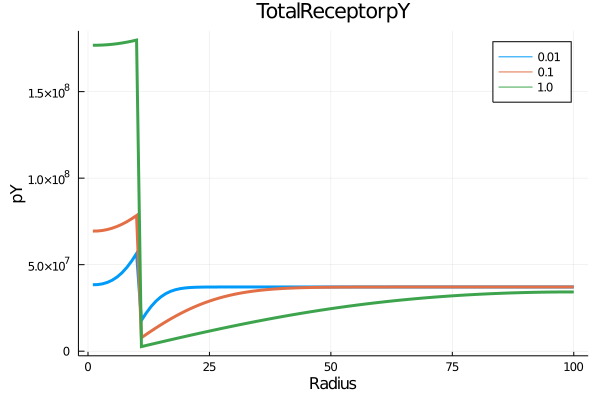

In [8]:
plotpY = view(cplot, 1, 1, :)
plot(r, plotpY, title = "Total Receptor pY", label = tps[1], lw = 3)
if length(tps) > 1
    for tt = 2:length(tps)
        plotpY = view(cplot, tt, tt, :)
        plot!(r, plotpY, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")

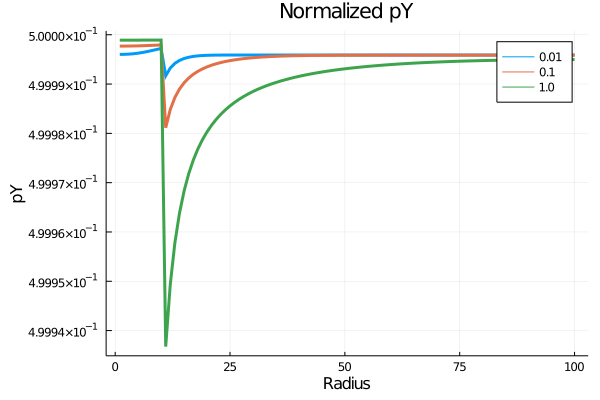

In [9]:
plotpY = view(total_normalized, 1, 1, :)
plot(r, plotpY, title = "Normalized pY", label = tps[1], lw = 3)
if length(tps) > 1
    for tt = 2:length(tps)
        plotpY = view(total_normalized, tt, tt, :)
        plot!(r, plotpY, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")